In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# загрузка данных и структура данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Анализ данных

In [8]:
# анализ данных
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Описание статистики
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
# Уникальные значения в столбце 'Class'
unique_classes = df['Class'].unique()

# Количество уникальных значений в столбце 'Class'
number_of_unique_classes = df['Class'].nunique()

# Вывод результатов
print(f"Уникальные значения в столбце 'Class': {unique_classes}")
print(f"Количество уникальных значений в столбце 'Class': {number_of_unique_classes}")

# Подсчет количества экземпляров для каждого класса
class_counts = df['Class'].value_counts()

# Вывод количества экземпляров в каждом классе
print("Количество экземпляров в каждом классе:")
print(class_counts)

Уникальные значения в столбце 'Class': [0 1]
Количество уникальных значений в столбце 'Class': 2
Количество экземпляров в каждом классе:
Class
0    284315
1       492
Name: count, dtype: int64


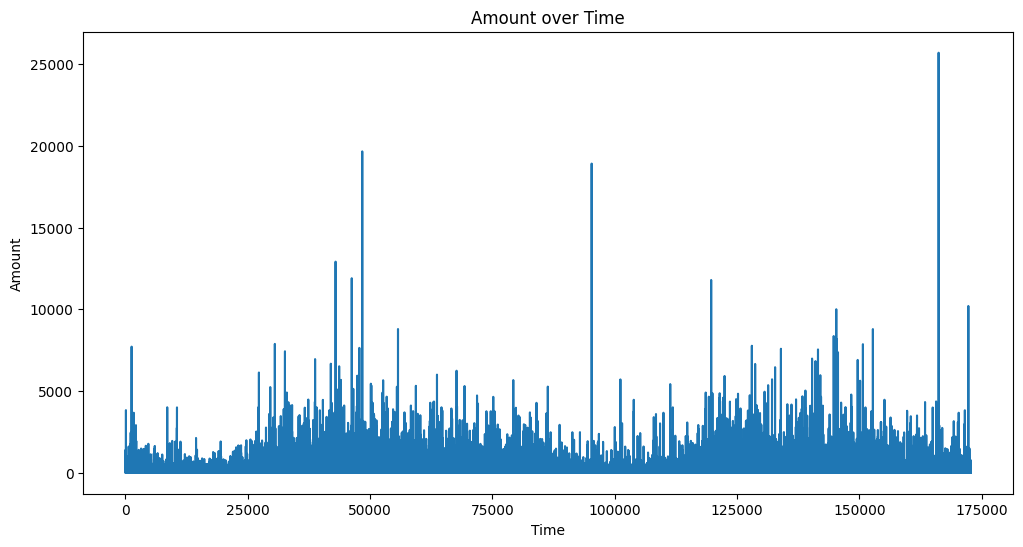

In [12]:
# График времени
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Amount'])
plt.title('Amount over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

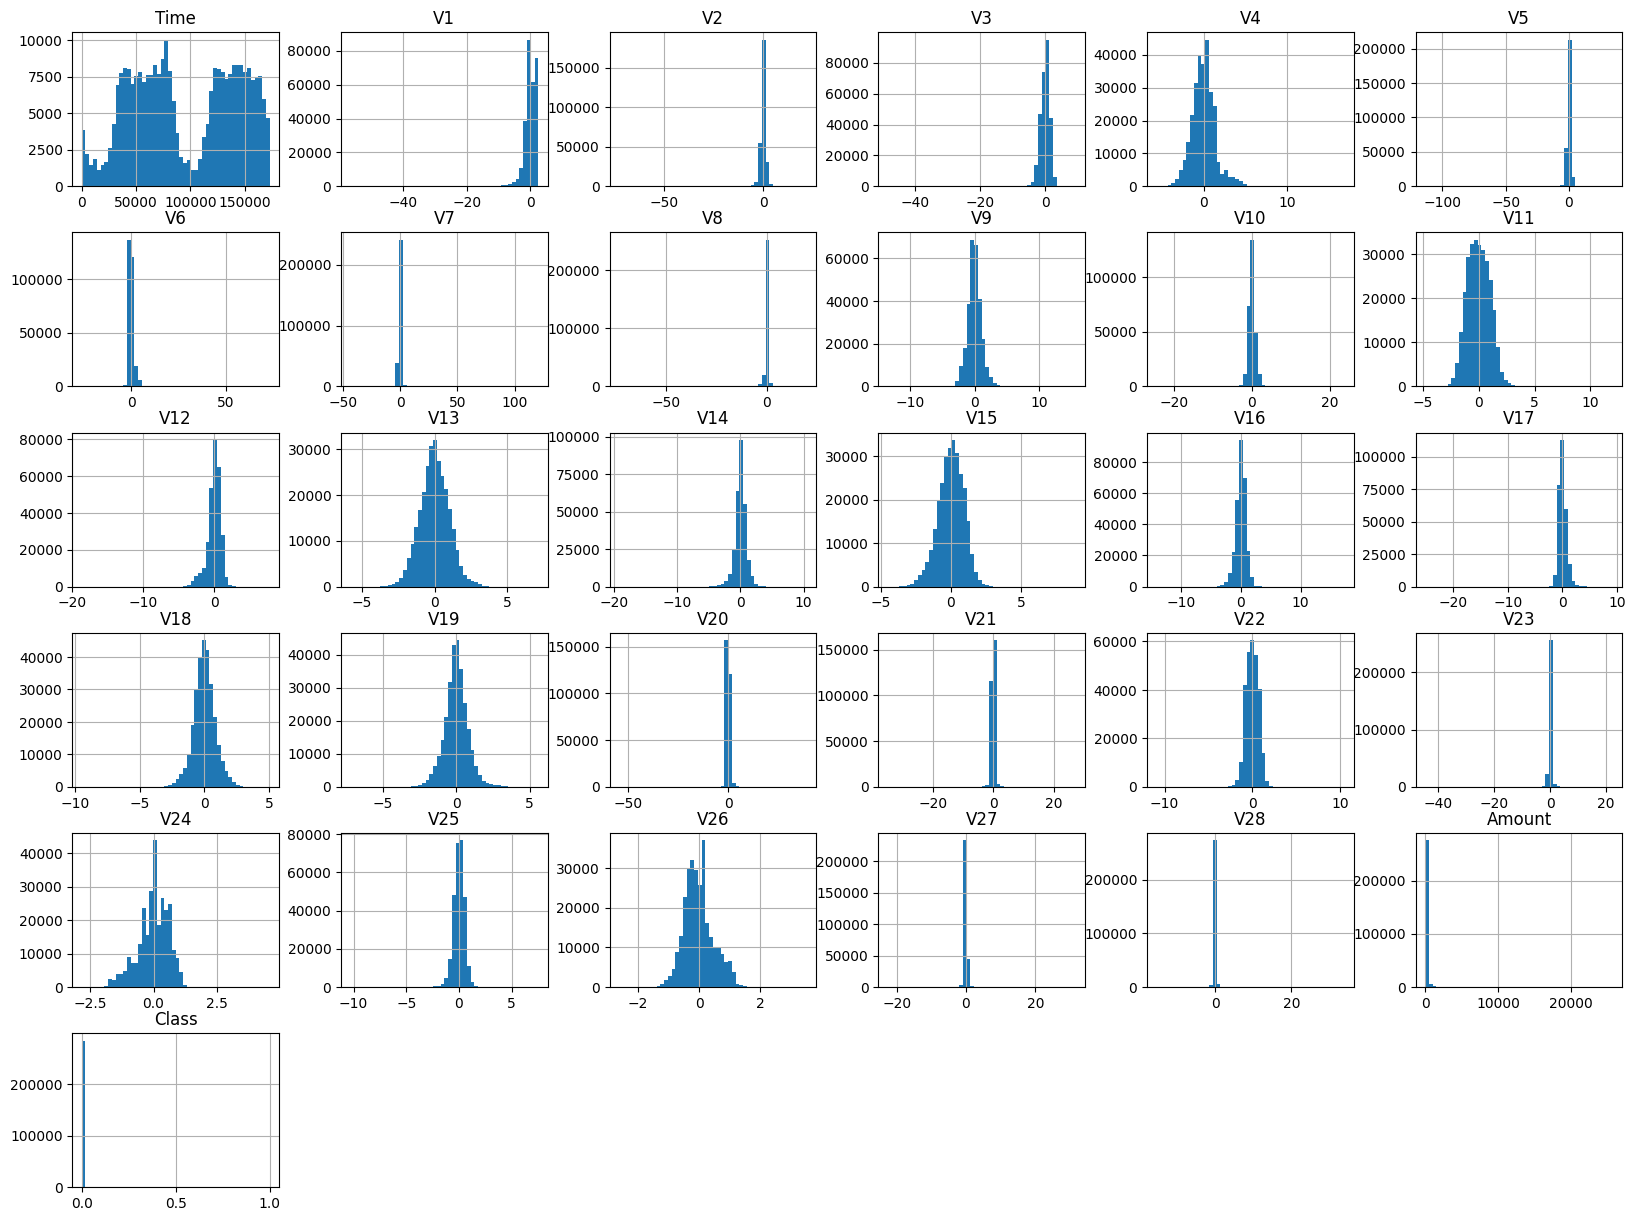

In [13]:
# Гистограммы для всех значений
df.hist(bins=50, figsize=(20, 15))
plt.show()

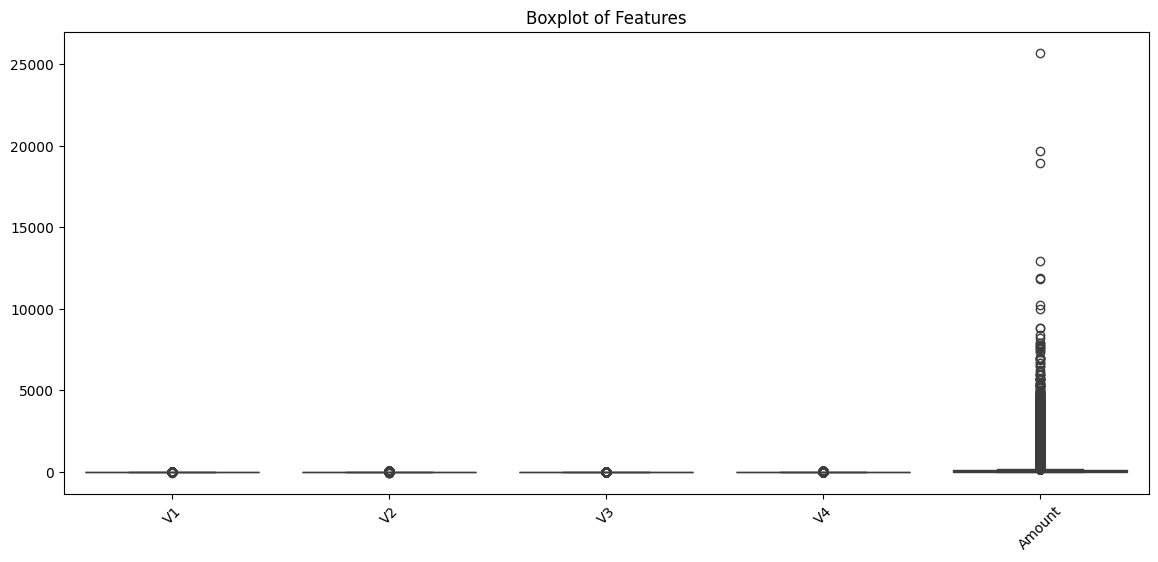

In [14]:
# Поиск выбросов
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['V1', 'V2', 'V3', 'V4', 'Amount']])
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()


In [15]:
# проверка наличия пропусков в данных
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
total_missing = missing_values.sum()
print(f"\nОбщее количество пропусков в данных: {total_missing}")

Series([], dtype: int64)

Общее количество пропусков в данных: 0


In [16]:
# названия столбцов
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# Транзакции

In [17]:
# Подсчет количества транзакций по классам
class_counts = df['Class'].value_counts()

# Получение количества обычных (0) и мошеннических (1) транзакций
normal_transactions = class_counts[0]  # Обычные транзакции
fraudulent_transactions = class_counts[1]  # Мошеннические транзакции

# Общее количество транзакций
total_transactions = df.shape[0]

# Вычисление процентного соотношения
percentage_normal = (normal_transactions / total_transactions) * 100
percentage_fraudulent = (fraudulent_transactions / total_transactions) * 100

# Вывод результатов
print(f"Обычные транзакции составляют: {normal_transactions} ({percentage_normal:.4f}%)")
print(f"Мошеннические транзакции составляют: {fraudulent_transactions} ({percentage_fraudulent:.4f}%)")


Обычные транзакции составляют: 284315 (99.8273%)
Мошеннические транзакции составляют: 492 (0.1727%)


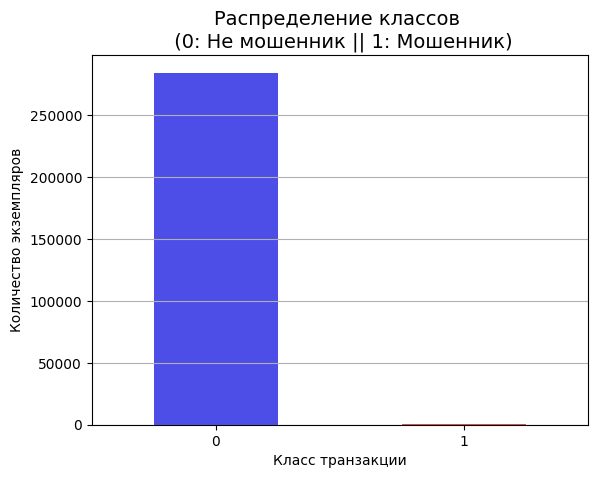

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Задание цветов для столбцов
colors = ["#0101DF", "#DF0101"]  # Синий для не мошенников, красный для мошенников

# Построение столбчатой диаграммы
class_counts.plot(kind='bar', color=colors, alpha=0.7)

# Добавление заголовка и меток
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.xlabel('Класс транзакции')
plt.ylabel('Количество экземпляров')
plt.xticks(ticks=range(len(class_counts)), labels=class_counts.index, rotation=0)
plt.grid(axis='y')

# Отображение графика
plt.show()

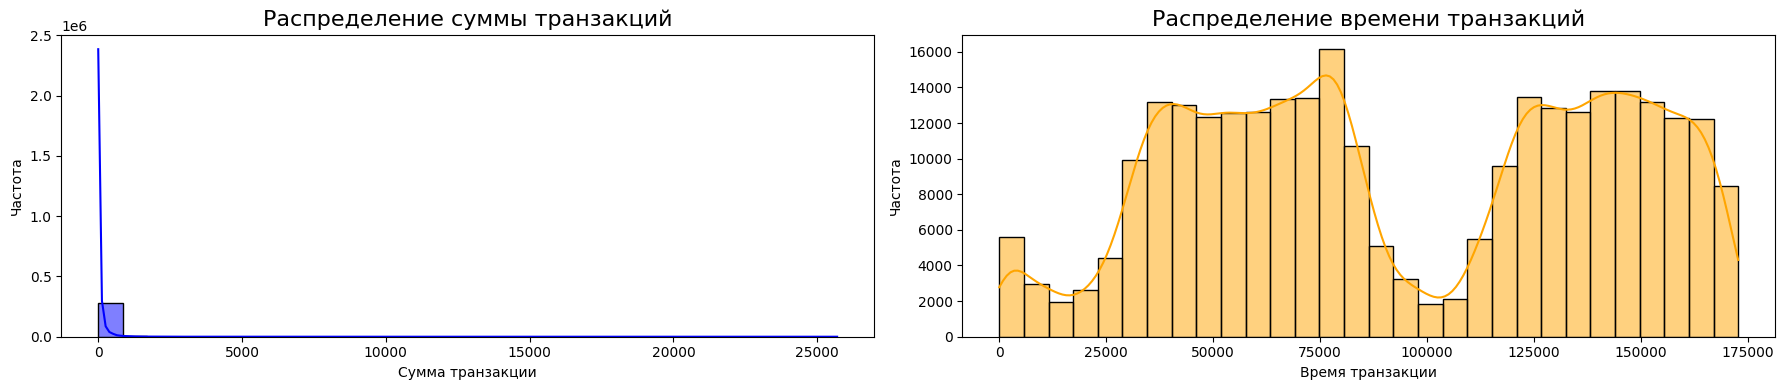

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем подграфики
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Предполагаем, что столбцы Amount и Time существуют в вашем DataFrame
amount_val = df['Amount']
time_val = df['Time']

# Строим график распределения суммы транзакций
sns.histplot(amount_val, bins=30, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Распределение суммы транзакций', fontsize=16)
ax[0].set_xlabel('Сумма транзакции')
ax[0].set_ylabel('Частота')

# Строим график распределения времени транзакций
sns.histplot(time_val, bins=30, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Распределение времени транзакций', fontsize=16)
ax[1].set_xlabel('Время транзакции')
ax[1].set_ylabel('Частота')

# Отображаем график
plt.tight_layout()
plt.show()


# Масштабирование

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np

# Создаем объект RobustScaler
rob_scaler = RobustScaler()  # Менее чувствителен к выбросам, чем просто стандартизация

# Отделяем признаки от целевой переменной
X = df.drop('Class', axis=1)
y = df['Class']

# Делим данные на обучающую и тестовую выборки
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print(f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print(f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print(f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print(f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print(f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# Преобразуем Amount с помощью RobustScaler
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1, 1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1, 1))

# Преобразуем Time с помощью RobustScaler
original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1, 1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1, 1))

# Убираем ненужные столбцы
original_Xtrain.drop(['Time', 'Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time', 'Amount'], axis=1, inplace=True)

# Преобразуем DataFrame в массивы NumPy
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Уникальные метки классов и их количество в тренировочном наборе
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)

# Уникальные метки классов и их количество в тестовом наборе
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

# Печатаем распределение классов
print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label / len(original_ytrain))
print("Тестовый набор:", test_counts_label / len(original_ytest))


Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


# Метод Random Under-Sampling

In [21]:
import pandas as pd

# Перемешиваем данные перед созданием подвыборок
df = df.sample(frac=1)

# Отбор мошеннических и ненормальных транзакций
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]  # ограничиваем выборки до 492 нормальных транзакций

# Создаем новый сбалансированный DataFrame
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

# Просмотр первых нескольких строк нового сбалансированного набора данных
print(new_df.head())


            Time        V1        V2        V3        V4        V5        V6  \
204308  135216.0  2.113178 -0.020820 -1.340207  0.247373  0.249065 -0.804040   
77348    57007.0 -1.271244  2.462675 -2.851395  2.324480 -1.372245 -0.948196   
147788   88987.0 -0.042450  1.071221 -0.534238 -1.166553  1.299519 -1.627177   
156990  109298.0 -1.000611  3.346850 -5.534491  6.835802 -0.299803  0.095951   
6331      7526.0  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   

              V7        V8        V9  ...       V21       V22       V23  \
204308  0.210796 -0.325727  0.495168  ... -0.328126 -0.775125  0.248150   
77348  -3.065234  1.166927 -2.268771  ...  0.652941  0.081931 -0.221348   
147788  2.048615 -0.861235  0.212342  ...  0.103342  0.900343 -0.316427   
156990 -2.440419  1.286301 -2.766438  ...  0.439757 -0.694099  0.299660   
6331   -1.631735  0.154612 -2.795892  ...  0.364514 -0.608057 -0.539528   

             V24       V25       V26       V27       V28  Amount  Cl

In [22]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_full.csv")

In [23]:
new_df.shape

(984, 31)

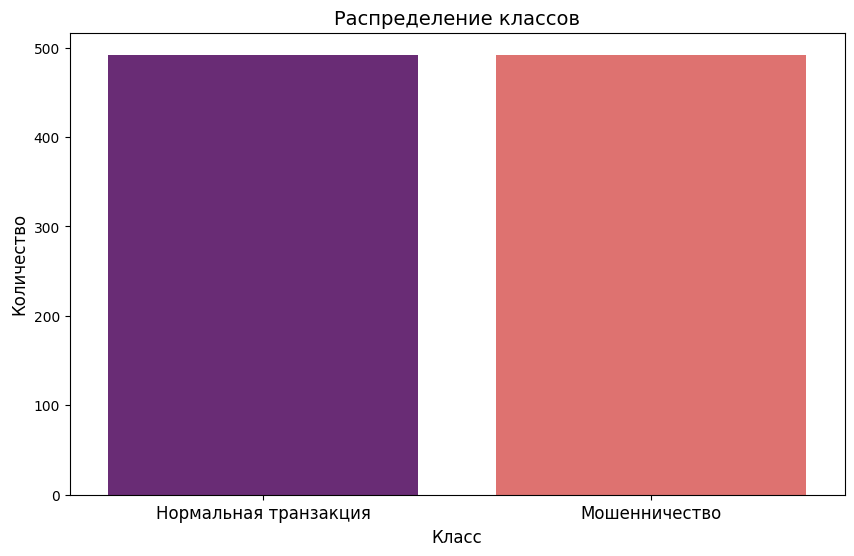

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагаем, что у вас есть столбец 'Class' в new_df, который мы хотим визуализировать
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=new_df, palette='magma')
plt.title('Распределение классов', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Нормальная транзакция', 'Мошенничество'], fontsize=12)

# Показываем график
plt.show()


# Матрица корреляций

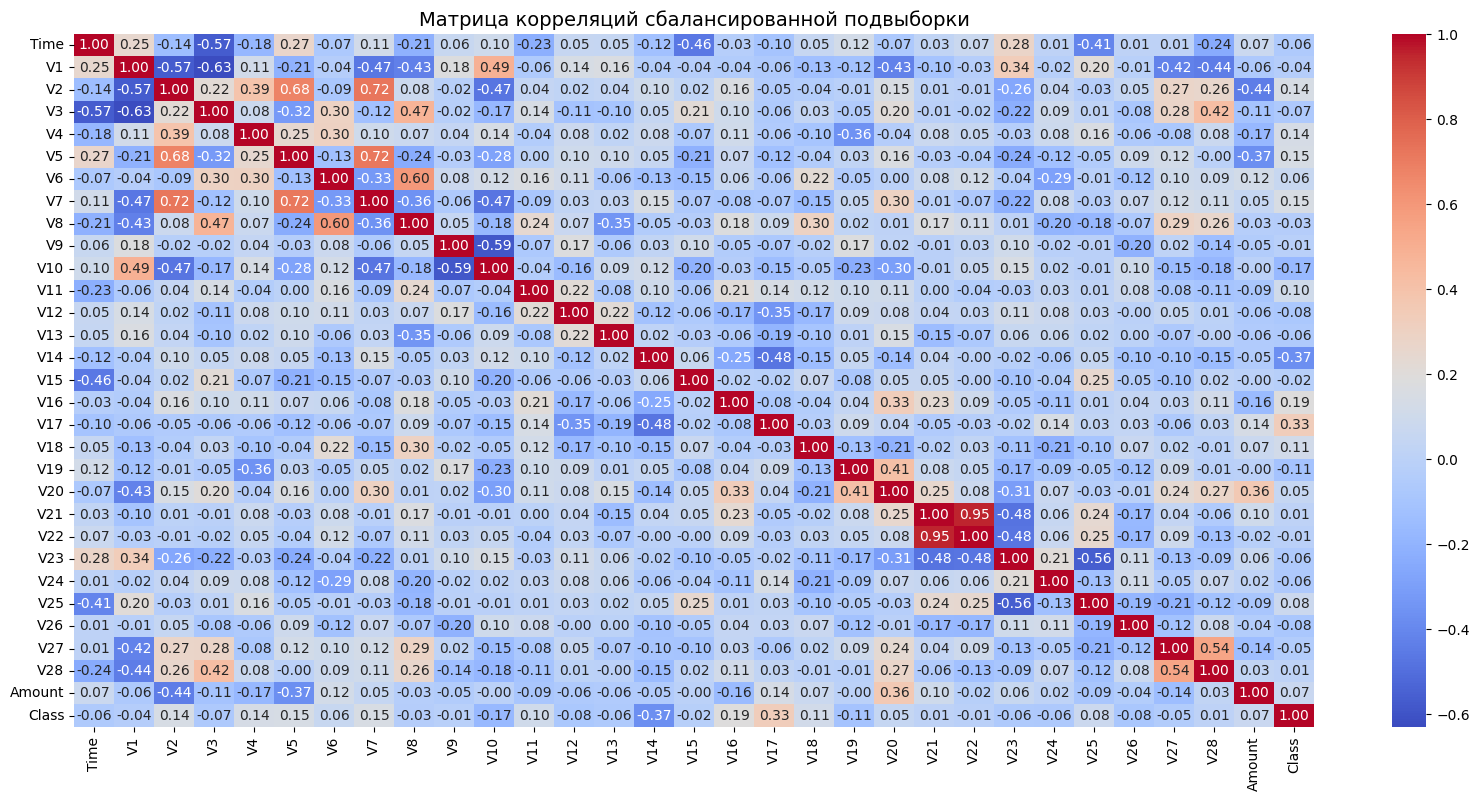

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедитесь, что в new_df нет пропусков, если есть - можно использовать new_df.fillna(0) или другую стратегию
correlation_matrix = new_df.corr()

# Настройка размера графика
f, ax = plt.subplots(1, 1, figsize=(20, 9))

# Построим матрицу корреляций
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Настройка заголовка графика
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Показываем график
plt.show()


# Boxplot

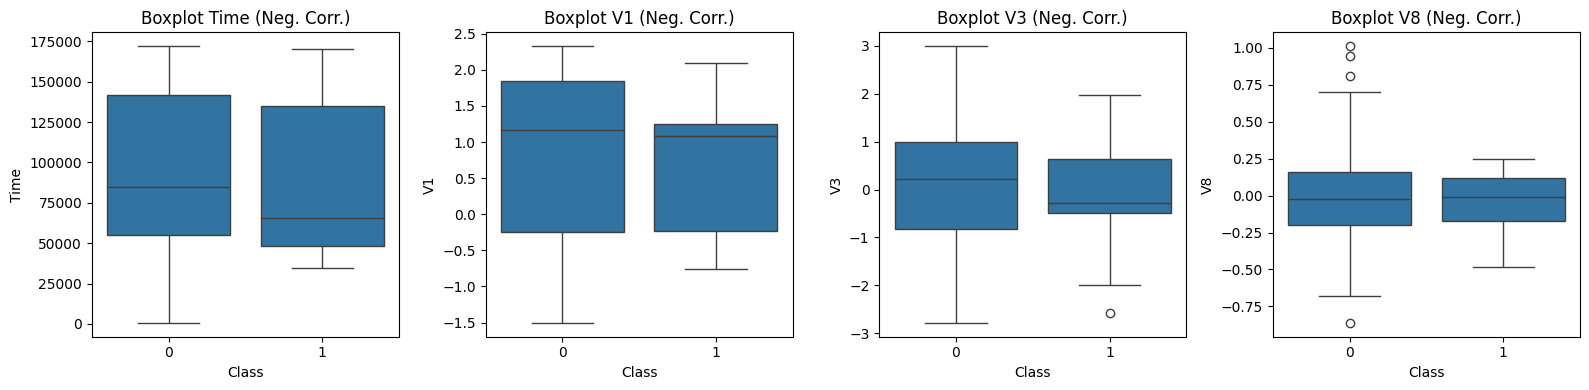

In [40]:
target_correlation = correlation_matrix['Class'].drop('Class')

# Отрицательные корреляции
negative_corr = target_correlation[target_correlation < 0].index.tolist()

# Положительные корреляции
positive_corr = target_correlation[target_correlation > 0].index.tolist()

# Создание boxplot для отрицательных корреляций
f, axes = plt.subplots(ncols=4, figsize=(16, 4))
for ax, feature in zip(axes, negative_corr):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax)
    ax.set_title(f'Boxplot {feature} (Neg. Corr.)')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


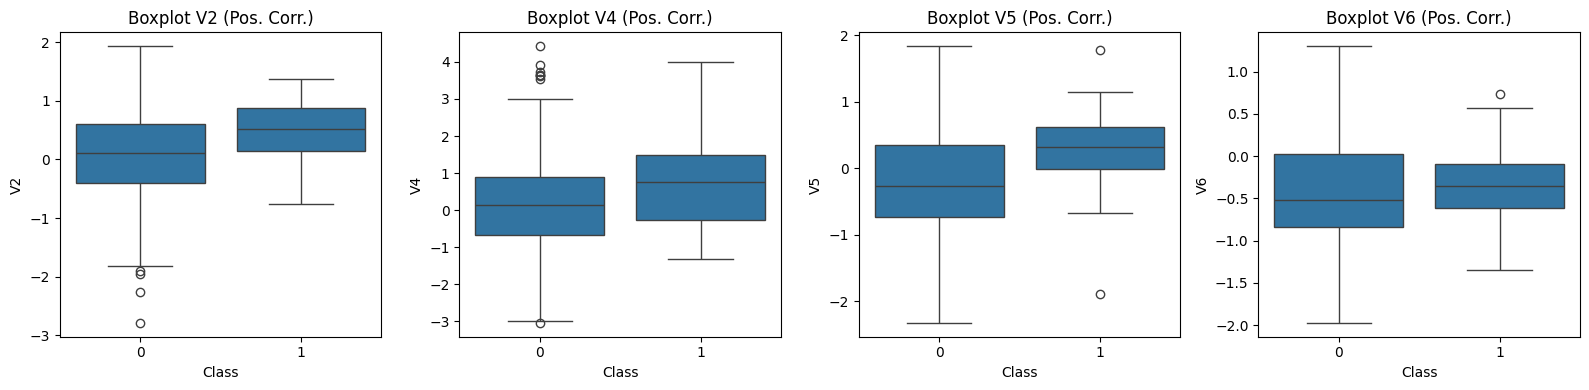

In [41]:
# Создание boxplot для положительных корреляций
f, axes = plt.subplots(ncols=4, figsize=(16, 4))
for ax, feature in zip(axes, positive_corr):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax)
    ax.set_title(f'Boxplot {feature} (Pos. Corr.)')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

# Обработка выбросов

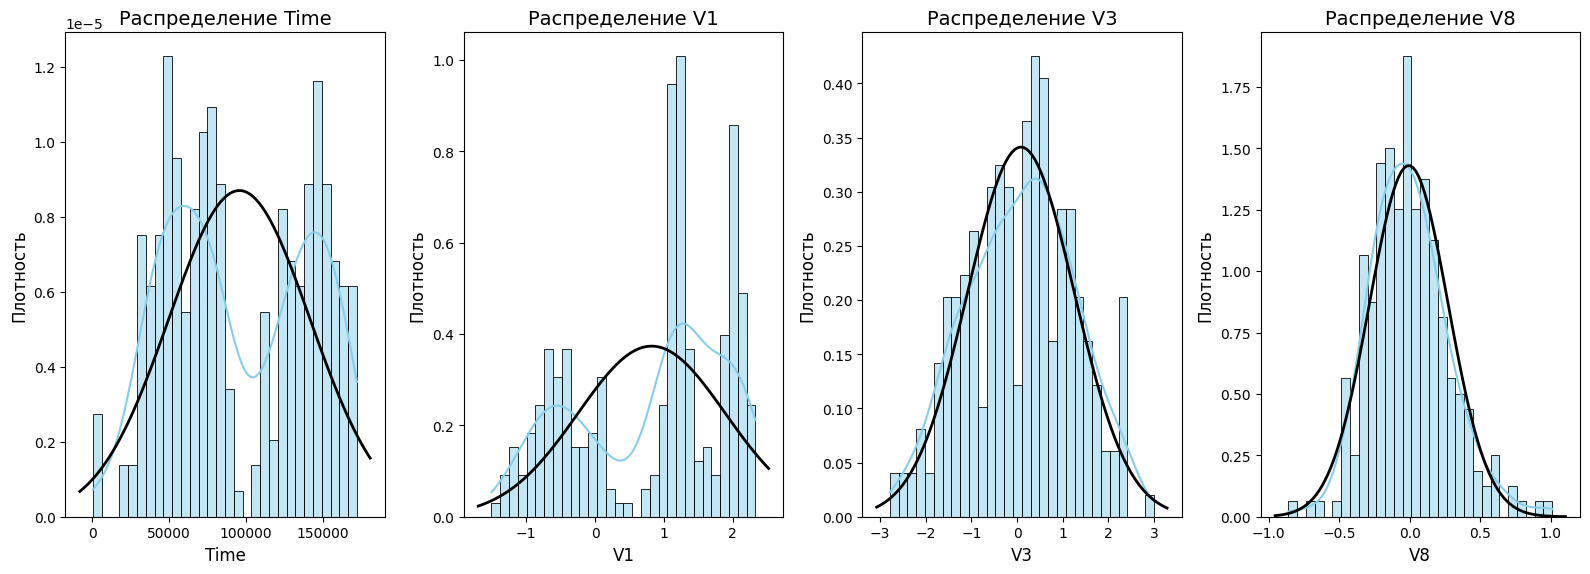

In [42]:
from scipy.stats import norm

# Создание подграфиков для признаков с отрицательной корреляцией
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6))

# Отображаем распределения для первых 4-х признаков с отрицательной корреляцией
for ax, feature in zip((ax1, ax2, ax3, ax4), negative_corr[:4]):
    sns.histplot(new_df[feature], bins=30, kde=True, ax=ax, stat="density", color='skyblue')

    # Наложение нормального распределения
    mu, std = norm.fit(new_df[feature])  # Подгонка нормального распределения
    xmin, xmax = ax.get_xlim()  # Получаем границы оси X
    x = np.linspace(xmin, xmax, 100)  # Создаем значения для оси X
    p = norm.pdf(x, mu, std)  # Вычисляем плотность вероятности
    ax.plot(x, p, 'k', linewidth=2)  # Отображаем нормальное распределение
    ax.set_title(f'Распределение {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Плотность', fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
import numpy as np

def remove_outliers_based_on_iqr(df, features):
    """
    Удаляет выбросы из указанных признаков на основе метода IQR и выводит границы и порог для каждого признака.

    :param df: входной DataFrame
    :param features: список признаков, из которых нужно удалить выбросы
    :return: DataFrame без выбросов
    """
    for feature in features:
        # Рассчитываем 25-ый и 75-ый перцентили
        q25 = np.percentile(df[feature], 25)
        q75 = np.percentile(df[feature], 75)
        iqr = q75 - q25

        # Определяем границы
        cut_off = iqr * 1.5
        lower = q25 - cut_off
        upper = q75 + cut_off

        # Удаляем выбросы
        outliers_before = df.shape[0]
        df = df[(df[feature] >= lower) & (df[feature] <= upper)]
        outliers_after = df.shape[0]

        outliers_count = outliers_before - outliers_after

        # Вывод информации
        print(f'Признак: {feature}')
        print('Порог: {}'.format(cut_off))
        print('Нижняя граница: {}'.format(lower))
        print('Верхняя граница: {}'.format(upper))
        print('Количество выбросов удалено: {}'.format(outliers_count))
        print('---' * 10)

    return df

# Признаки для проверки выбросов
features_to_check = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                     'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                     'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                     'V24', 'V25', 'V26', 'V27', 'V28']

# Вызов функции для удаления выбросов
new_df_without_outliers = remove_outliers_based_on_iqr(new_df, features_to_check)

print('Количество строк после удаления выбросов: {}'.format(len(new_df_without_outliers)))


Признак: V1
Порог: 5.8604598521622
Нижняя граница: -8.72768136760506
Верхняя граница: 6.90021157149414
Количество выбросов удалено: 92
------------------------------
Признак: V2
Порог: 3.3229719954948846
Нижняя граница: -3.563798925977459
Верхняя граница: 5.297459728675567
Количество выбросов удалено: 46
------------------------------
Признак: V3
Порог: 5.61428535089691
Нижняя граница: -8.775069662513008
Верхняя граница: 6.196357939878753
Количество выбросов удалено: 12
------------------------------
Признак: V4
Порог: 4.998568837248025
Нижняя граница: -5.418710434653855
Верхняя граница: 7.910806464674213
Количество выбросов удалено: 4
------------------------------
Признак: V5
Порог: 2.5775842034120955
Нижняя граница: -3.6818860702339933
Верхняя граница: 3.1916718055315947
Количество выбросов удалено: 46
------------------------------
Признак: V6
Порог: 1.8420942401839515
Нижняя граница: -2.9746864121174292
Верхняя граница: 1.937564895039775
Количество выбросов удалено: 44
-----------

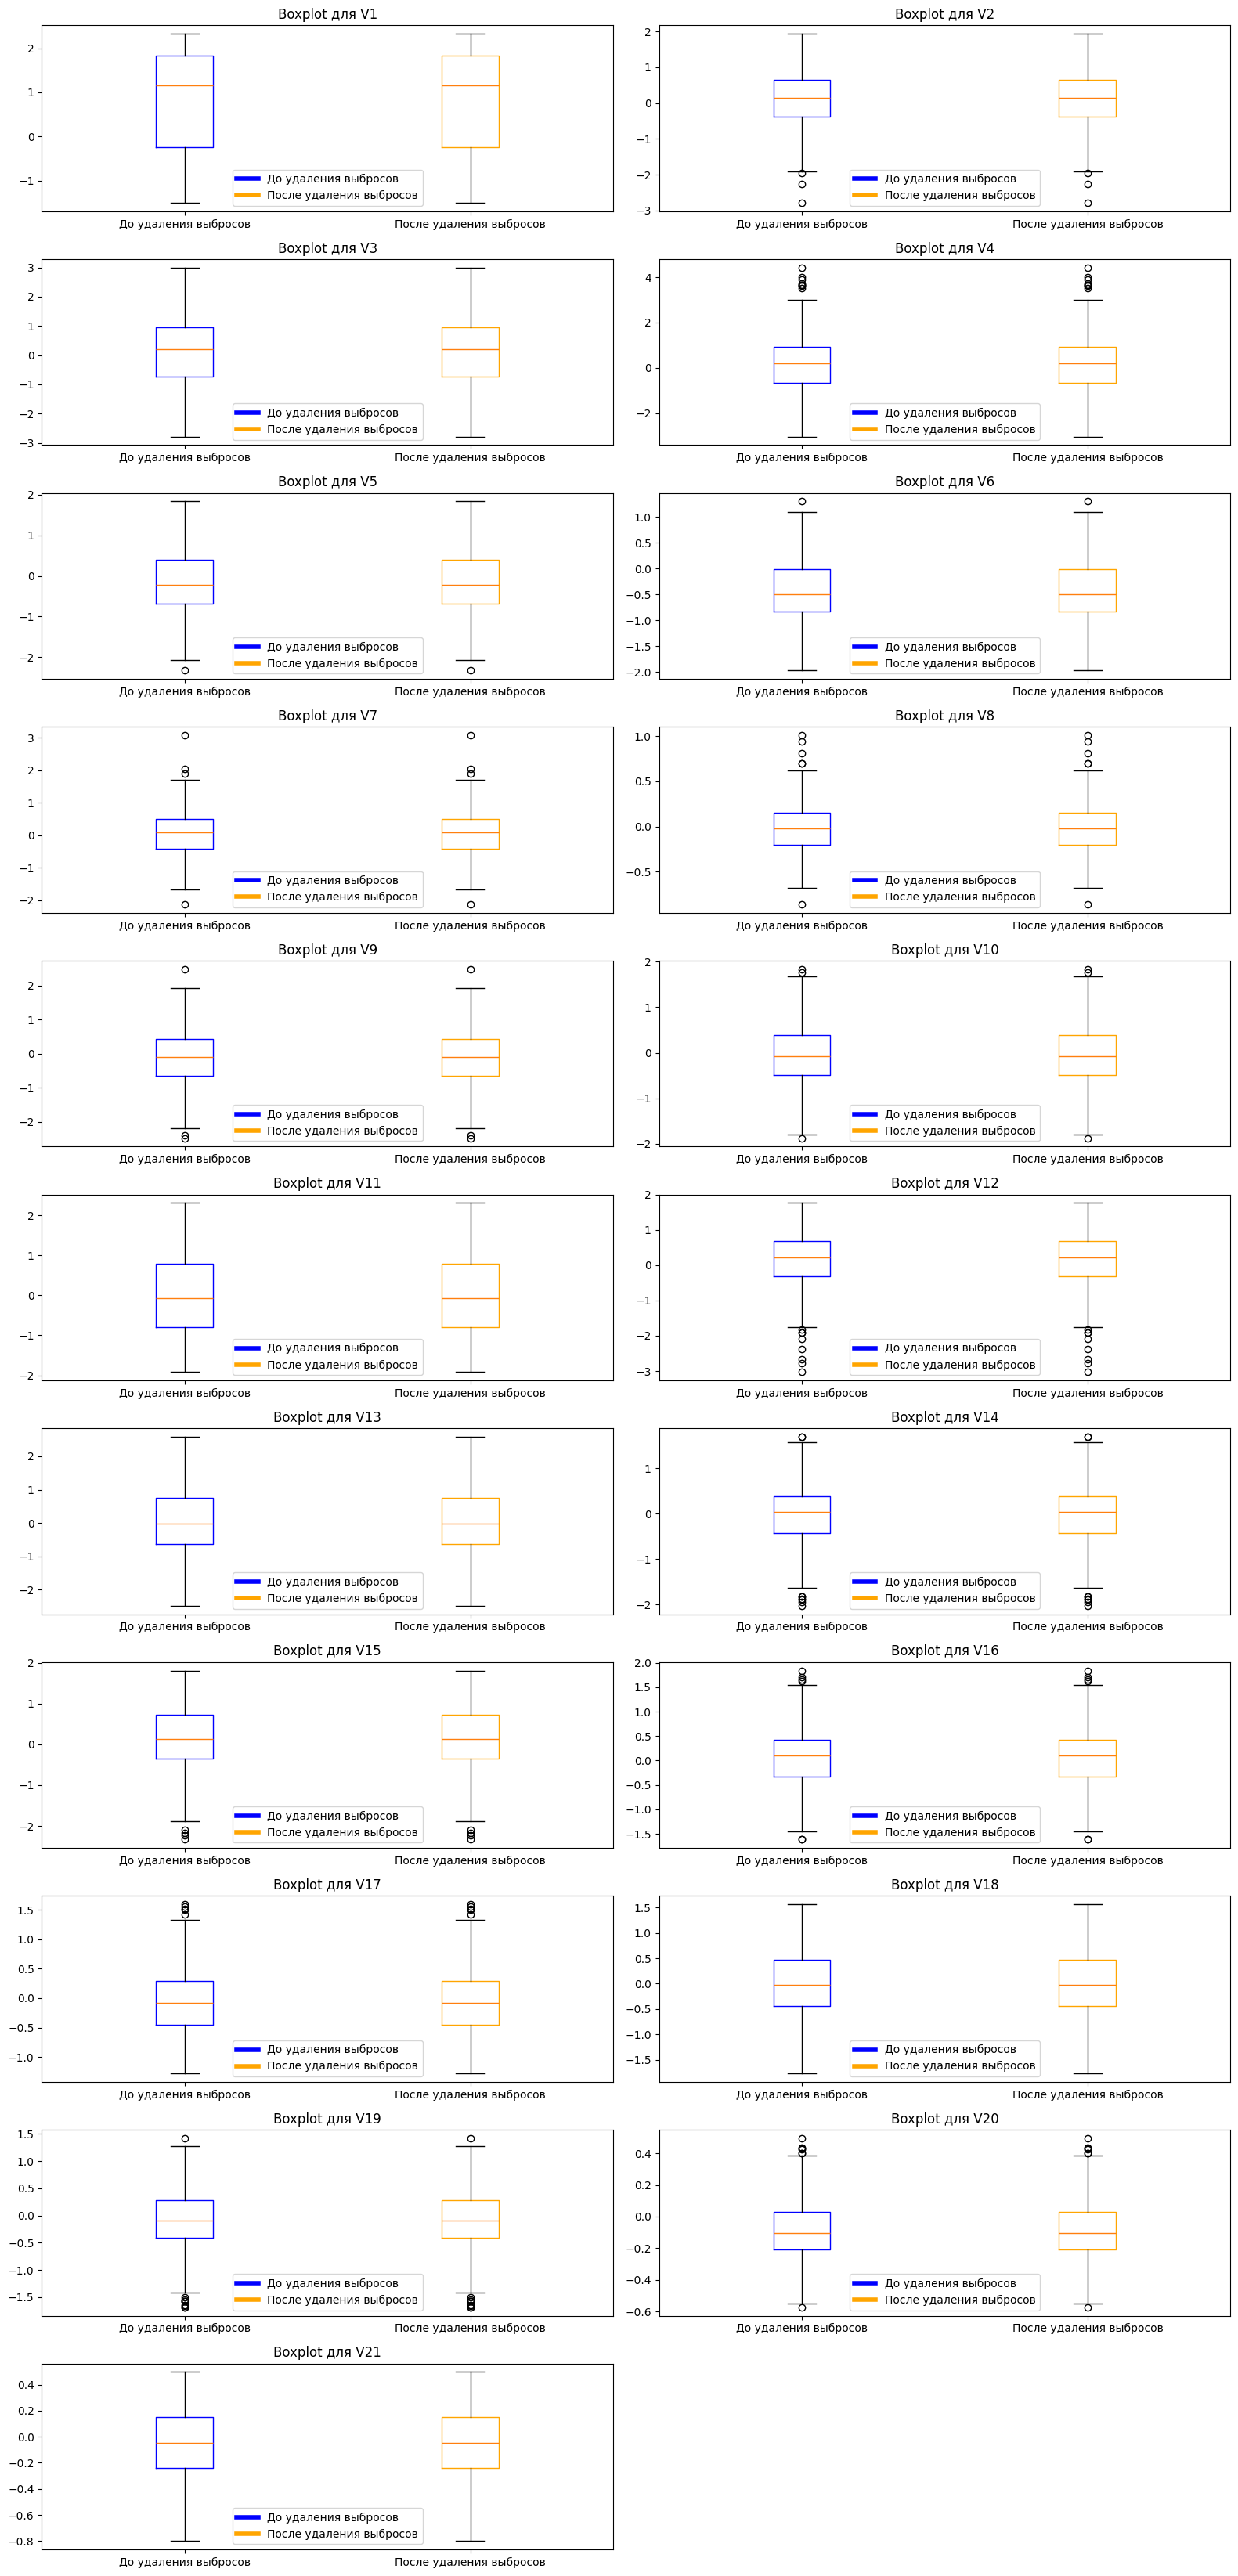

In [44]:
import matplotlib.pyplot as plt

# Определите количество признаков
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
                    'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
                    'V16', 'V17', 'V18', 'V19', 'V20', 'V21']
num_features = len(features_to_plot)

# Рассчитываем количество строк и столбцов для подграфиков
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols  # округляем вверх

# Создайте подграфики для визуализации
f, ax = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))

# Проходим по каждому признаку и создаем boxplot
for i, feature in enumerate(features_to_plot):
    row = i // num_cols  # Определяем номер строки
    col = i % num_cols   # Определяем номер колонки

    # Сначала boxplot до удаления выбросов
    ax[row, col].boxplot(new_df[feature], positions=[0], widths=0.2, boxprops=dict(color='blue'))

    # Затем boxplot после удаления выбросов
    ax[row, col].boxplot(new_df_without_outliers[feature], positions=[1], widths=0.2, boxprops=dict(color='orange'))

    # Заголовок и подписи
    ax[row, col].set_title(f'Boxplot для {feature}')
    ax[row, col].set_xticks([0, 1])
    ax[row, col].set_xticklabels(['До удаления выбросов', 'После удаления выбросов'])

    # Добавляем легенду
    blue_box = plt.Line2D([0], [0], color='blue', lw=4, label='До удаления выбросов')
    orange_box = plt.Line2D([0], [0], color='orange', lw=4, label='После удаления выбросов')
    ax[row, col].legend(handles=[blue_box, orange_box])

# Если количество признаков меньше количества подграфиков, скрываем пустые субграфики
for i in range(num_features, num_rows * num_cols):
    ax.flatten()[i].axis('off')  # Скрываем пустые оси

plt.tight_layout()
plt.show()


In [31]:
import matplotlib.pyplot as plt

# теперь у нас в датафрейме new_df будут лежать данные без выбросов.
new_df = new_df_without_outliers

# Понижение размерности и кластеризация

In [45]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Извлечение признаков и целевой переменной
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Удаление несоответствующих признаков
X.drop(['Time', 'Amount'], axis=1, inplace=True)

# T-SNE алгоритм
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("T-SNE заняло {:.2f} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2f} сек".format(t1 - t0))

# Truncated SVD алгоритм
t0 = time.time()
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced_svd = svd.fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2f} сек".format(t1 - t0))


T-SNE заняло 1.52 сек
PCA заняло 0.00 сек
Truncated SVD заняло 0.00 сек


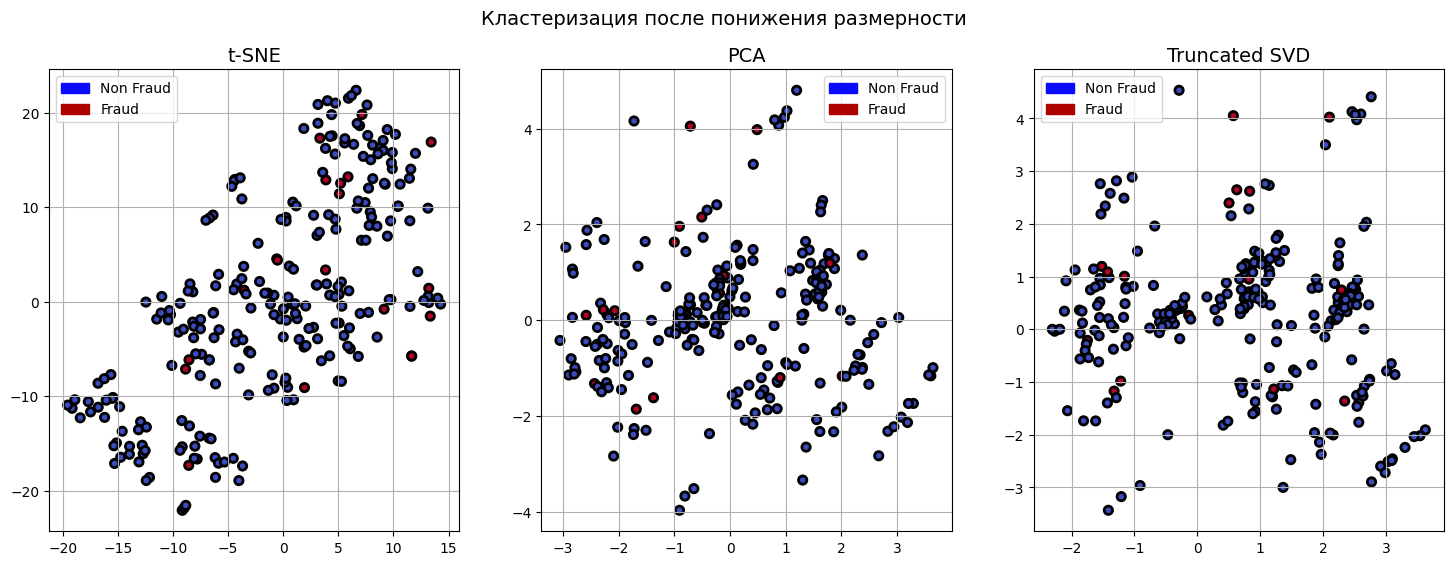

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Создание графиков
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# T-SNE scatter plot
sc1 = ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', linewidths=2, edgecolor='k')
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
sc2 = ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=2, edgecolor='k')
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
sc3 = ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=2, edgecolor='k')
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Функция для оценки кластеризации
def evaluate_clustering(X, true_labels):
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, cluster_labels)
    calinski = calinski_harabasz_score(X, cluster_labels)
    davies = davies_bouldin_score(X, cluster_labels)

    return silhouette, calinski, davies

# Оценка кластеризации для каждой из техник снижения размерности
scores_tsne = evaluate_clustering(X_reduced_tsne, y)
scores_pca = evaluate_clustering(X_reduced_pca, y)
scores_svd = evaluate_clustering(X_reduced_svd, y)

print("Результаты оценки кластеризации:")
print("\nt-SNE\nSilhouette Score: {:.4f}\nCalinski-Harabasz Score: {:.4f}\nDavies-Bouldin Score: {:.4f}".format(*scores_tsne))
print("\nPCA\nSilhouette Score: {:.4f}\nCalinski-Harabasz Score: {:.4f}\nDavies-Bouldin Score: {:.4f}".format(*scores_pca))
print("\nTruncated SVD\nSilhouette Score: {:.4f}\nCalinski-Harabasz Score: {:.4f}\nDavies-Bouldin Score: {:.4f}".format(*scores_svd))


Результаты оценки кластеризации:

t-SNE
Silhouette Score: 0.4644
Calinski-Harabasz Score: 361.0411
Davies-Bouldin Score: 0.7830

PCA
Silhouette Score: 0.3848
Calinski-Harabasz Score: 152.7116
Davies-Bouldin Score: 1.0983

Truncated SVD
Silhouette Score: 0.4098
Calinski-Harabasz Score: 170.4499
Davies-Bouldin Score: 0.9358


1. Silhouette Score: измеряет, насколько близки точки в одном кластере друг к другу по сравнению с точками в других кластерах.

2. Calinski-Harabasz Score: более высокие значения указывают на лучшую кластеризацию.

3. Davies-Bouldin Score: это мера, где более низкие значения указывают на лучшие кластеры.


In [35]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')